[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](
https://colab.research.google.com/github/jotabruno/CLIMATE_CHANGE_CMIP6/blob/main/1GCM_CMIP6_VARIABLES_SUPERFICIE.ipynb
)


In [1]:
import intake
import matplotlib.pyplot as plt
import xmip
from xmip.preprocessing import combined_preprocessing
import gcsfs
import numpy as np
import random

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
cat = intake.open_esm_datastore(cat_url)
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,<NA>,20170706
...,...,...,...,...,...,...,...,...,...,...,...
514813,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514814,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tauu,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514815,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hur,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207
514816,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,hus,gr,gs://cmip6/CMIP6/CMIP/EC-Earth-Consortium/EC-E...,<NA>,20211207


In [13]:
# Filtramos el catálogo para una variable, tabla, experimento y modelo específicos
cat2 = cat.search(
    variable_id = 'tas',        # temperatura superficial 
    table_id = 'Amon',          # datos mensuales del océano
    experiment_id = 'historical',  # simulación histórica
    #source_id = ['ACCESS-CM2','MPI-ESM1-2-HR','NorESM2-MM','ECMWF-IFS-LR'],      # modelo
    source_id =[      'CMCC-CM2-HR4',      'EC-Earth3P-HR',    'HadGEM3-GC31-MM',
    'HadGEM3-GC31-HM',    'HadGEM3-GC31-LM',         'EC-Earth3P',
       'ECMWF-IFS-HR',       'ECMWF-IFS-LR',    'HadGEM3-GC31-LL',
      'CMCC-CM2-VHR4',           'GFDL-CM4',           'GFDL-AM4',
       'IPSL-CM6A-LR',           'E3SM-1-0',         'CNRM-CM6-1',
          'GFDL-ESM4',         'GFDL-ESM2M',       'GFDL-CM4C192',
        'GFDL-OM4p5B',        'GISS-E2-1-G',        'GISS-E2-1-H',
        'CNRM-ESM2-1',        'BCC-CSM2-MR',           'BCC-ESM1',
             'MIROC6',      'AWI-CM-1-1-MR',       'EC-Earth3-LR',
   'IPSL-CM6A-ATM-HR',              'CESM2',        'CESM2-WACCM',
      'CNRM-CM6-1-HR',         'MRI-ESM2-0',        'SAM0-UNICON',
     'GISS-E2-1-G-CC',        'UKESM1-0-LL',          'EC-Earth3',
      'EC-Earth3-Veg',        'FGOALS-f3-L',            'CanESM5',
      'CanESM5-CanOE',          'INM-CM4-8',          'INM-CM5-0',
              'NESM3',    'MPI-ESM-1-2-HAM',        'CAMS-CSM1-0',
      'MPI-ESM1-2-LR',      'MPI-ESM1-2-HR',      'MRI-AGCM3-2-H',
      'MRI-AGCM3-2-S',         'MCM-UA-1-0',          'INM-CM5-H',
         'KACE-1-0-G',         'NorESM2-LM',        'FGOALS-f3-H',
          'FGOALS-g3',         'MIROC-ES2L',        'FIO-ESM-2-0',
            'NorCPM1',          'NorESM1-F',      'MPI-ESM1-2-XR',
 'CESM1-1-CAM5-CMIP5',           'E3SM-1-1',          'KIOST-ESM',
         'ACCESS-CM2',         'NorESM2-MM',      'ACCESS-ESM1-5',
           'IITM-ESM',        'GISS-E2-2-G',          'CESM2-FV2',
        'GISS-E2-2-H',    'CESM2-WACCM-FV2',              'CIESM',
       'E3SM-1-1-ECA',            'TaiESM1',     'AWI-ESM-1-1-LR',
   'EC-Earth3-Veg-LR',          'CMCC-ESM2',       'CMCC-CM2-SR5',
  'EC-Earth3-AerChem',  'IPSL-CM6A-LR-INCA',    'IPSL-CM5A2-INCA',
        'BCC-CSM2-HR',     'EC-Earth3P-VHR',     'CESM1-WACCM-SC',
         'CAS-ESM2-0',       'EC-Earth3-CC',         'MIROC-ES2H',
        'ICON-ESM-LR'],
    member_id = ['r1i1p1f1'],      # miembro
    grid_label = 'gn'
)
# Mostramos el DataFrame resultante con los metadatos filtrados
cat2.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NASA-GISS,GISS-E2-1-G,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/hi...,<NA>,20180827
1,CMIP,BCC,BCC-CSM2-MR,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-CSM2-MR/historic...,<NA>,20181126
2,CMIP,MIROC,MIROC6,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MIROC/MIROC6/historical/...,<NA>,20181212
3,CMIP,BCC,BCC-ESM1,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/BCC/BCC-ESM1/historical/...,<NA>,20181214
4,CMIP,MRI,MRI-ESM2-0,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/MRI/MRI-ESM2-0/historica...,<NA>,20190222
5,CMIP,NCAR,CESM2-WACCM,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2-WACCM/histori...,<NA>,20190227
6,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,<NA>,20190308
7,CMIP,SNU,SAM0-UNICON,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/SNU/SAM0-UNICON/historic...,<NA>,20190323
8,CMIP,NASA-GISS,GISS-E2-1-H,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NASA-GISS/GISS-E2-1-H/hi...,<NA>,20190403
9,CMIP,CCCma,CanESM5,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/CCCma/CanESM5/historical...,<NA>,20190429


In [14]:
# 2. Abrir todos los modelos (36)
# ==============================
ds_dict_full = cat2.to_dataset_dict(
    zarr_kwargs={"consolidated": True}
)



--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [38]:
for key, ds in ds_dict_full.items():
    print("="*80)
    print(key)
    print("source_id:", ds.attrs.get("source_id"))
    print("dims:", ds.dims)
    print("coords:", list(ds.coords))
    print("tas dims:", ds["tas"].dims)
    print("tas shape:", ds["tas"].shape)


CMIP.CAS.FGOALS-g3.historical.Amon.gn
source_id: FGOALS-g3
dims: FrozenMappingWarningOnValuesAccess({'lat': 80, 'bnds': 2, 'lon': 180, 'member_id': 1, 'dcpp_init_year': 1, 'time': 2004})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 2004, 80, 180)
CMIP.MRI.MRI-ESM2-0.historical.Amon.gn
source_id: MRI-ESM2-0
dims: FrozenMappingWarningOnValuesAccess({'lat': 160, 'bnds': 2, 'lon': 320, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['height', 'lat', 'lat_bnds', 'lon', 'lon_bnds', 'time', 'time_bnds', 'member_id', 'dcpp_init_year']
tas dims: ('member_id', 'dcpp_init_year', 'time', 'lat', 'lon')
tas shape: (1, 1, 1980, 160, 320)
CMIP.NASA-GISS.GISS-E2-2-H.historical.Amon.gn
source_id: GISS-E2-2-H
dims: FrozenMappingWarningOnValuesAccess({'lat': 90, 'bnds': 2, 'lon': 144, 'member_id': 1, 'dcpp_init_year': 1, 'time': 1980})
coords: ['hei

## PLOT SUDAMERICA ##


Modelos válidos para Sudamérica: 34


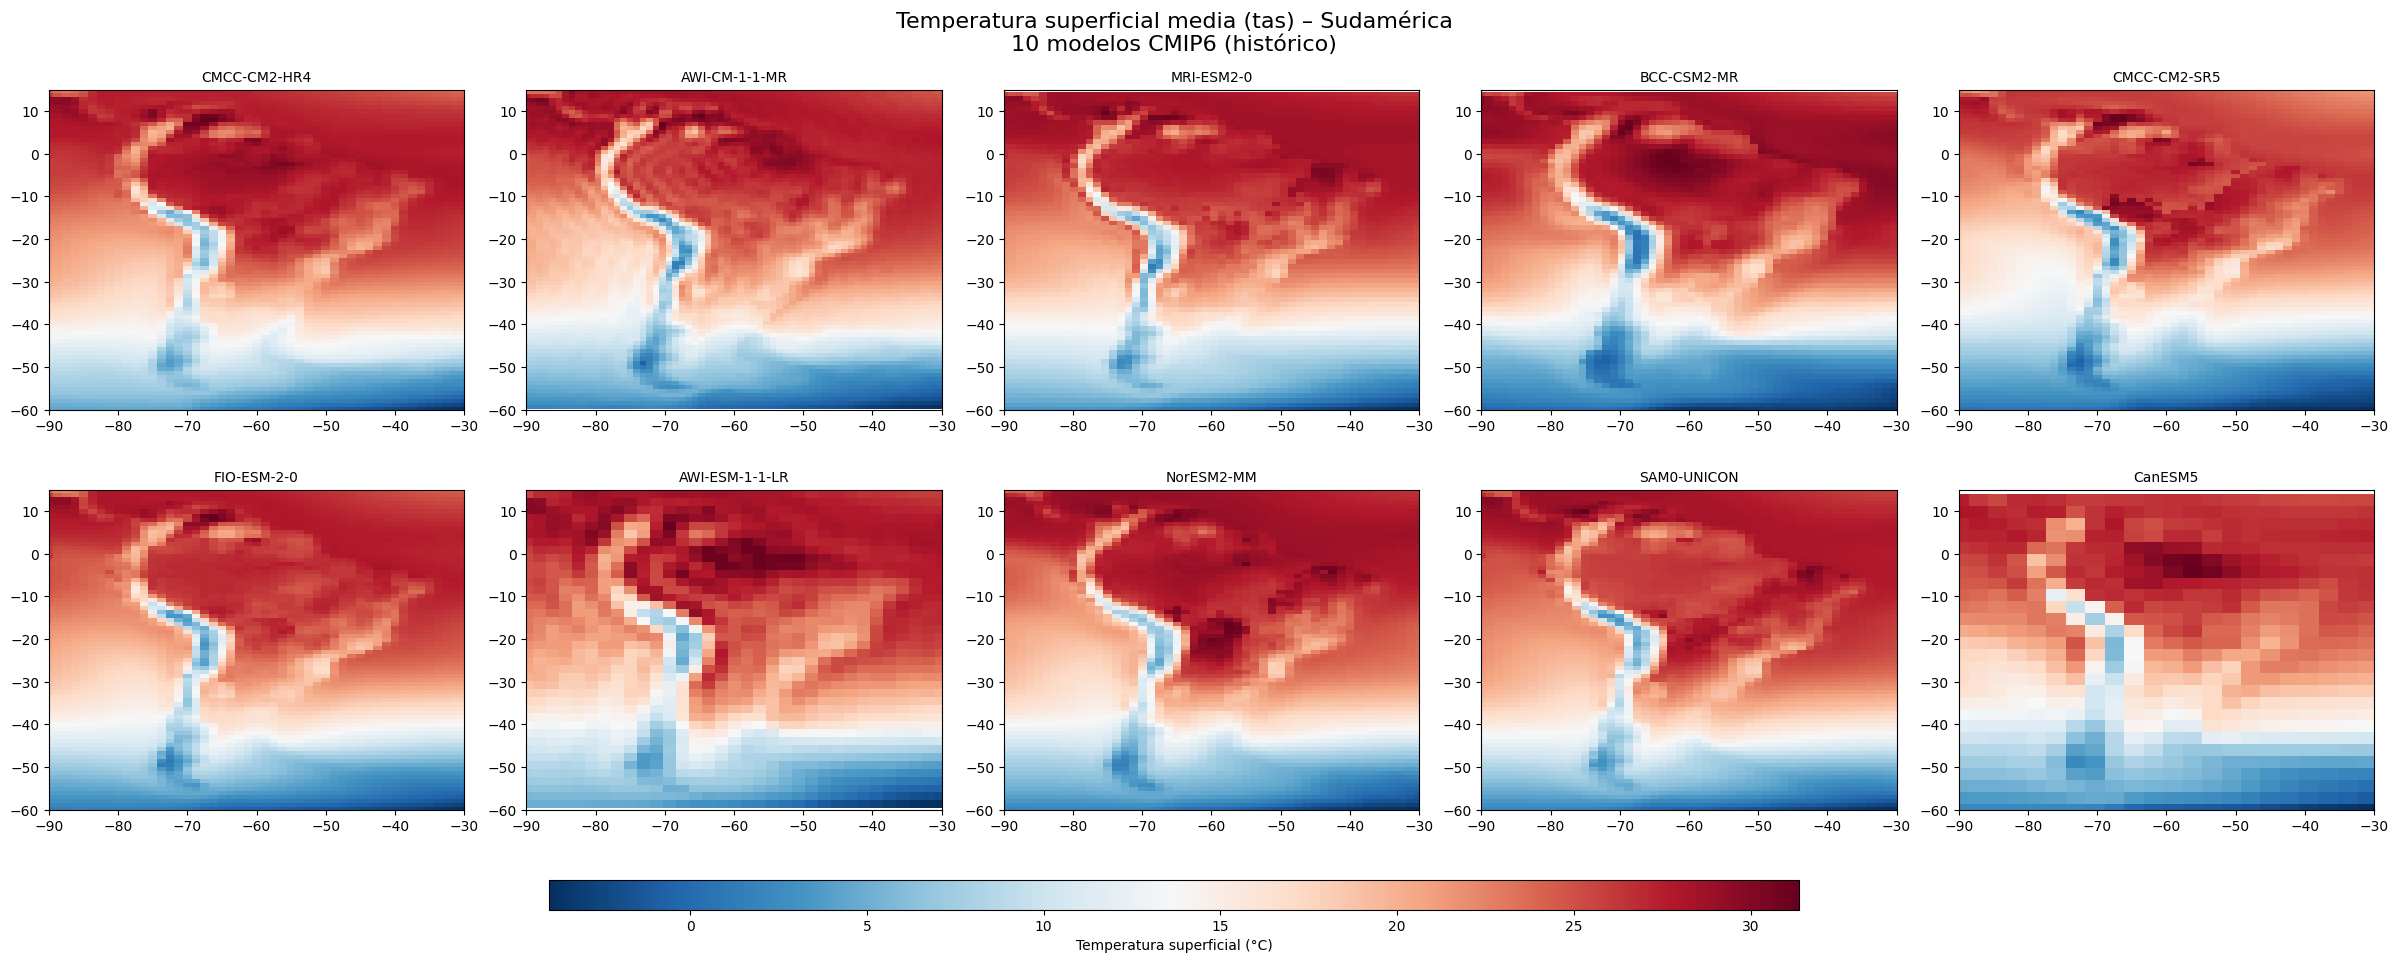

In [36]:
# ==============================
# 3. Dominio Sudamérica
# ==============================
lon_min, lon_max = -90, -30
lat_min, lat_max = -60, 15

# ==============================
# 4. Filtrar modelos realmente ploteables
# ==============================
valid_items = []

for key, ds in ds_dict_full.items():

    tas = ds["tas"]

    # debe ser lat-lon
    if not {"lat", "lon"}.issubset(tas.dims):
        continue

    tas = tas.squeeze().mean(dim="time", skipna=True) - 273.15

    # convertir longitudes 0–360 → −180–180 si aplica
    if tas.lon.max() > 180:
        tas = tas.assign_coords(
            lon=((tas.lon + 180) % 360) - 180
        ).sortby("lon")

    # probar recorte Sudamérica
    tas_sa = tas.sel(
        lon=slice(lon_min, lon_max),
        lat=slice(lat_min, lat_max)
    )

    # dominio no vacío
    if tas_sa.lon.size == 0 or tas_sa.lat.size == 0:
        continue

    valid_items.append((key, ds))

print(f"Modelos válidos para Sudamérica: {len(valid_items)}")

# ==============================
# 5. Seleccionar EXACTAMENTE 10
# ==============================
random.seed(42)
selected_items = random.sample(valid_items, 10)
ds_dict = dict(selected_items)

# ==============================
# 6. Figura fija 2 × 5
# ==============================
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()

im = None

# ==============================
# 7. Loop de mapas
# ==============================
for ax, (key, ds) in zip(axes, ds_dict.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze().mean(dim="time", skipna=True) - 273.15

    if tas.lon.max() > 180:
        tas = tas.assign_coords(
            lon=((tas.lon + 180) % 360) - 180
        ).sortby("lon")

    tas_sa = tas.sel(
        lon=slice(lon_min, lon_max),
        lat=slice(lat_min, lat_max)
    )

    im = ax.pcolormesh(
        tas_sa.lon,
        tas_sa.lat,
        tas_sa,
        cmap="RdBu_r",
        shading="auto"
    )

    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.set_title(src, fontsize=10)

# ==============================
# 8. Layout
# ==============================
fig.subplots_adjust(
    left=0.05,
    right=0.98,
    top=0.90,
    bottom=0.18,
    wspace=0.15,
    hspace=0.25
)

# ==============================
# 9. Barra de colores inferior
# ==============================
cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

# ==============================
# 10. Título
# ==============================
fig.suptitle(
    "Temperatura superficial media (tas) – Sudamérica\n10 modelos CMIP6 (histórico)",
    fontsize=16
)

plt.show()

## PLOTE PERU ##


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


Modelos válidos para Perú: 34


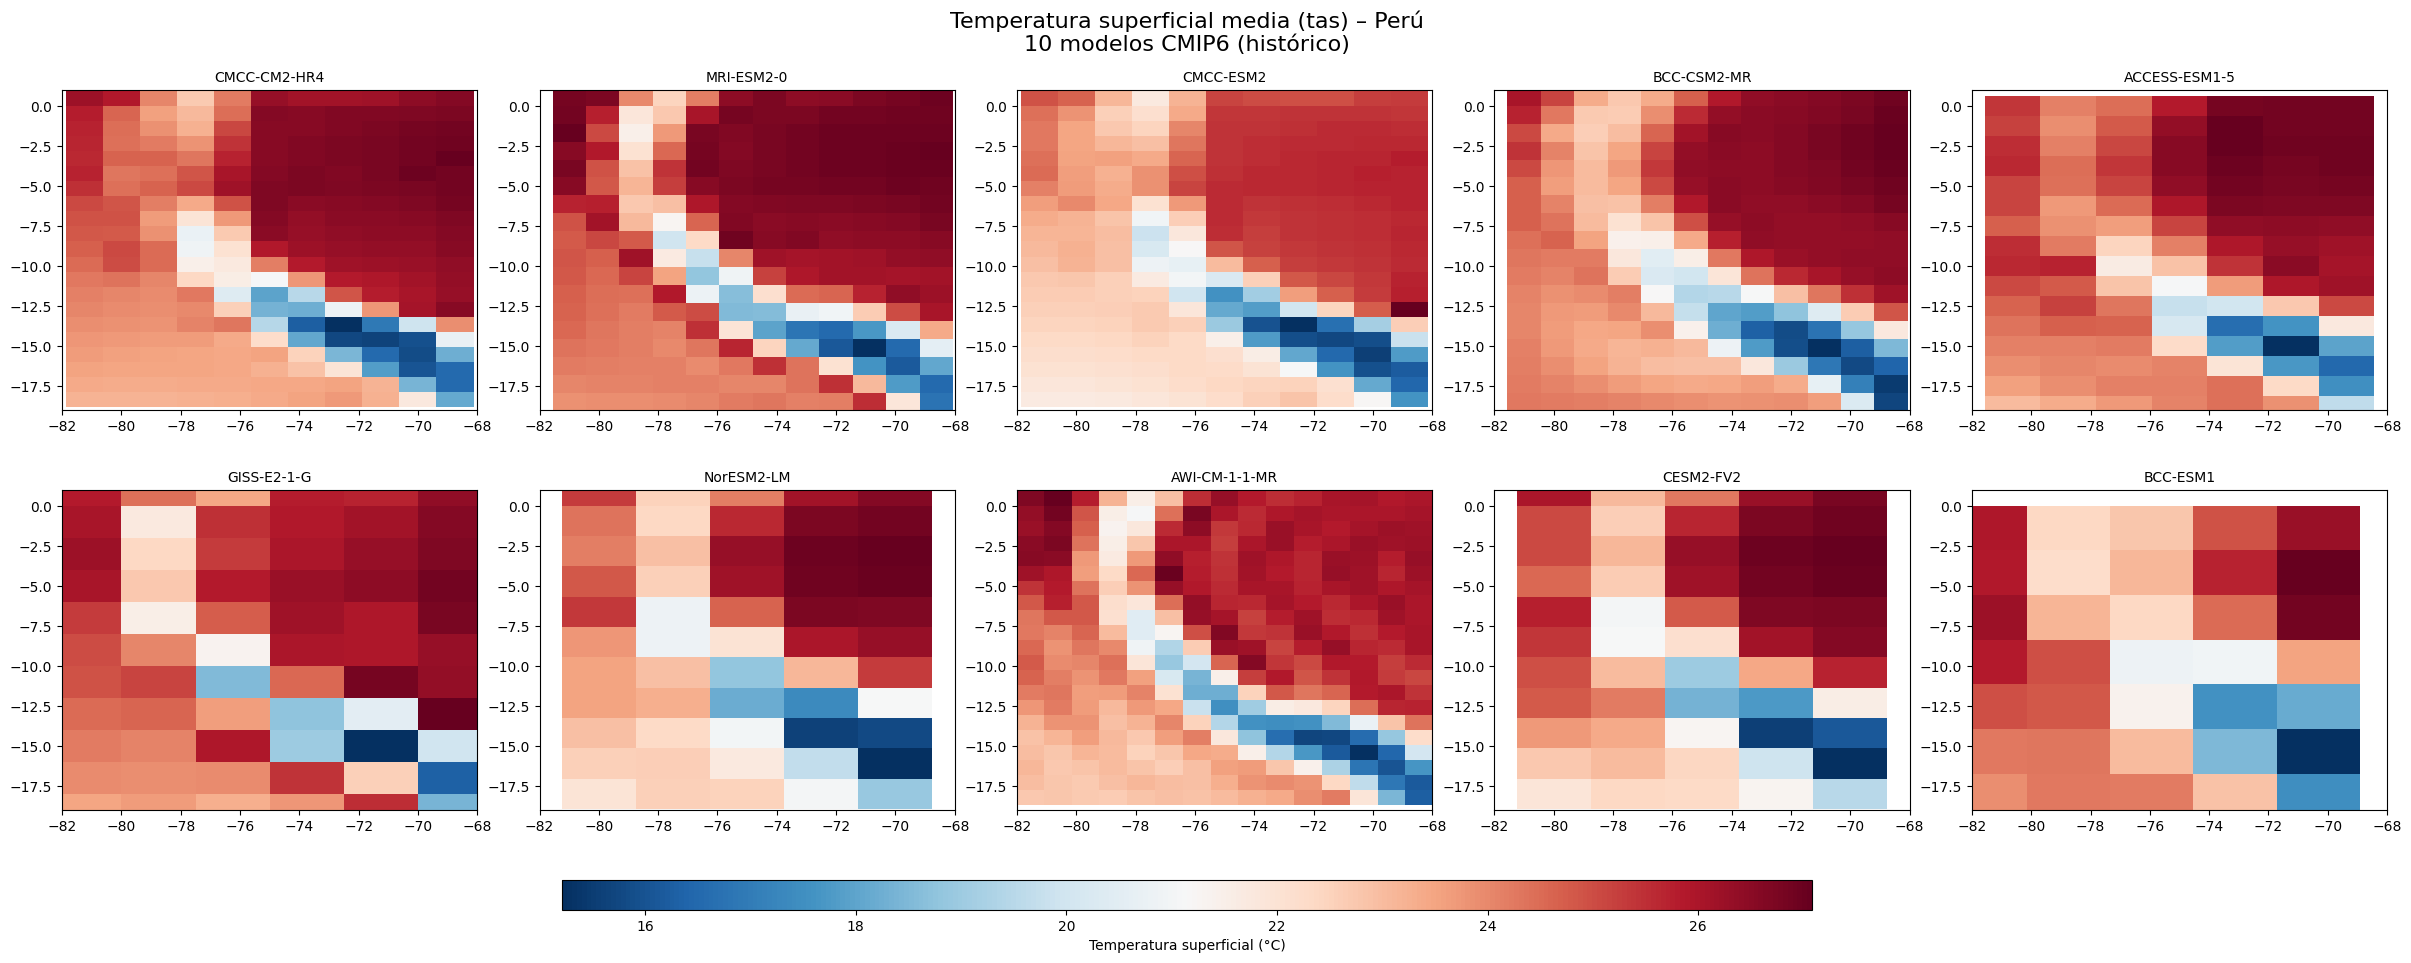

In [37]:
# ==============================
# 3. Dominio Perú
# ==============================
lon_min, lon_max = -82, -68
lat_min, lat_max = -19, 1

# ==============================
# 4. Filtrar modelos ploteables en Perú
# ==============================
valid_items = []

for key, ds in ds_dict_full.items():

    tas = ds["tas"]

    # debe tener lat-lon
    if not {"lat", "lon"}.issubset(tas.dims):
        continue

    # media temporal
    tas_map = tas.squeeze().mean(dim="time", skipna=True) - 273.15

    # convertir longitudes 0–360 → −180–180
    if tas_map.lon.max() > 180:
        tas_map = tas_map.assign_coords(
            lon=((tas_map.lon + 180) % 360) - 180
        ).sortby("lon")

    # recorte Perú
    tas_pe = tas_map.sel(
        lon=slice(lon_min, lon_max),
        lat=slice(lat_min, lat_max)
    )

    # dominio válido
    if tas_pe.lon.size == 0 or tas_pe.lat.size == 0:
        continue

    valid_items.append((key, ds))

print(f"Modelos válidos para Perú: {len(valid_items)}")

# ==============================
# 5. Seleccionar EXACTAMENTE 10
# ==============================
random.seed(42)
selected_items = random.sample(valid_items, 10)
ds_dict = dict(selected_items)

# ==============================
# 6. Figura 2 × 5
# ==============================
fig, axes = plt.subplots(2, 5, figsize=(25, 10))
axes = axes.flatten()

im = None

# ==============================
# 7. Loop de mapas
# ==============================
for ax, (key, ds) in zip(axes, ds_dict.items()):

    src = ds.attrs.get("source_id", "unknown")

    tas = ds["tas"].squeeze().mean(dim="time", skipna=True) - 273.15

    if tas.lon.max() > 180:
        tas = tas.assign_coords(
            lon=((tas.lon + 180) % 360) - 180
        ).sortby("lon")

    tas_pe = tas.sel(
        lon=slice(lon_min, lon_max),
        lat=slice(lat_min, lat_max)
    )

    im = ax.pcolormesh(
        tas_pe.lon,
        tas_pe.lat,
        tas_pe,
        cmap="RdBu_r",
        shading="auto"
    )

    ax.set_xlim(lon_min, lon_max)
    ax.set_ylim(lat_min, lat_max)
    ax.set_title(src, fontsize=10)

# ==============================
# 8. Layout
# ==============================
fig.subplots_adjust(
    left=0.05,
    right=0.98,
    top=0.90,
    bottom=0.18,
    wspace=0.15,
    hspace=0.25
)

# ==============================
# 9. Barra de colores inferior
# ==============================
cax = fig.add_axes([0.25, 0.08, 0.5, 0.03])
cbar = fig.colorbar(im, cax=cax, orientation="horizontal")
cbar.set_label("Temperatura superficial (°C)")

# ==============================
# 10. Título
# ==============================
fig.suptitle(
    "Temperatura superficial media (tas) – Perú\n10 modelos CMIP6 (histórico)",
    fontsize=16
)

plt.show()
